[View in Colaboratory](https://colab.research.google.com/github/duakaran96/Handwritten-Digits-Classifier/blob/master/DigitsClassify.ipynb)

# Logistic Regression (Preloaded digits dataset)

scikit-learn library comes with a few small datasets that do not require to download from any external website.

We'll apply Logistic Regression to classify handwritten digits based off the digits dataset under scikit-learn.

### Each datapoint in the dataset is a 8 x 8 image of a digit.


## Imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### The code below will load digits dataset.

In [0]:
from sklearn.datasets import load_digits

In [0]:
digits = load_digits()

We'll store features ( 8 x 8 pixel information of each handwritten digit image) into X, a numpy array
and target (denoting the digit) into y, also a numpy array

In [0]:
X = digits.data

In [5]:
type(X)

numpy.ndarray

In [0]:
y = digits.target

In [7]:
type(y)

numpy.ndarray

In [8]:
X.shape

(1797, 64)

In [9]:
y.shape

(1797,)

### Let's view some of the images stored under data.images[]

We'll view images with the help of matplotlib's matshow()

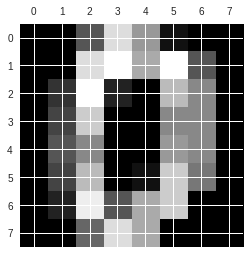

In [10]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

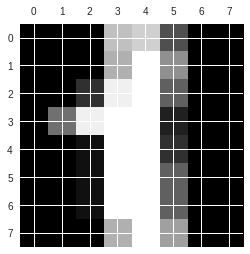

In [11]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

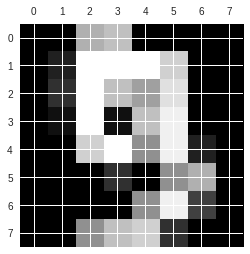

In [12]:
plt.gray()
plt.matshow(digits.images[9])
plt.show()

# Building a Logistic Regression model

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train.shape

(1257, 64)

## Creating and Training the Model

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [18]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##  Predictions from our Model

Let's grab predictions off our test set and see how well it did!


In [0]:
predictions = log.predict(X_test)

## Model Evaluation
Let's Evaluate our model by checking some evaluation metrics!

In [29]:
print('Score:')
score = log.score(X_test, y_test)
score

Score:


0.9685185185185186

In [0]:
import sklearn.metrics as met

Calculating Prediction probability for each prediction made by the model

Passing it into **log_loss** function and printing out the log_loss

In [22]:
predprob = log.predict_proba(X_test)
logLoss = met.log_loss(y_test, predprob)
print('Log loss: '+str(logLoss))

Log loss: 0.16877359836747335


### Checking out other evaluation metrics

In [30]:
print('Accuracy Score: ')
met.accuracy_score(y_test, predictions)

Accuracy Score: 


0.9685185185185186

In [23]:
R2_score = met.r2_score(y_test, predictions)
print('R2 Score:' +str(R2_score))

R2 Score:0.9510678957408394


In [24]:
mae = met.mean_absolute_error(y_test, predictions)
print('Mean Absolute Error: '+str(mae))

Mean Absolute Error: 0.09444444444444444


In [25]:
mse = met.mean_squared_error(y_test, predictions)
print('Mean Squared Error: '+str(mse))

Mean Squared Error: 0.39444444444444443


In [26]:
cm = met.confusion_matrix(y_test, predictions)
print('Confusion Matrix')
cm

Confusion Matrix


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  1,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 54,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 55,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 45]])

In a nicer way, we can view our confusion matrix as a seaborn heatmap below:

Text(0.5,1,'Accuracy Score: 0.9685185185185186')

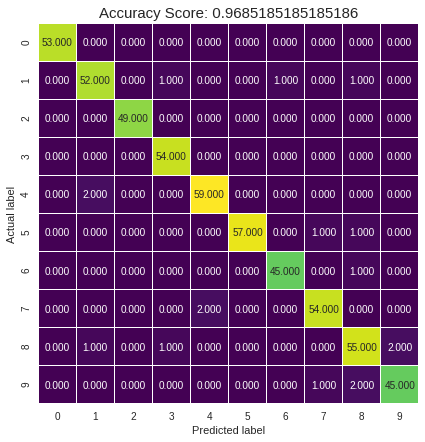

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: '+str(score)
plt.title(title, size = 15)

In [28]:
print('Classification Report: ')
cr = met.classification_report(y_test, predictions)
print(cr)

Classification Report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        53
          1       0.95      0.95      0.95        55
          2       1.00      1.00      1.00        49
          3       0.96      1.00      0.98        54
          4       0.97      0.97      0.97        61
          5       1.00      0.97      0.98        59
          6       0.98      0.98      0.98        46
          7       0.96      0.96      0.96        56
          8       0.92      0.93      0.92        59
          9       0.96      0.94      0.95        48

avg / total       0.97      0.97      0.97       540

